In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

(272, 2)
[ 3.6 79. ]
[ 1.8 54. ]


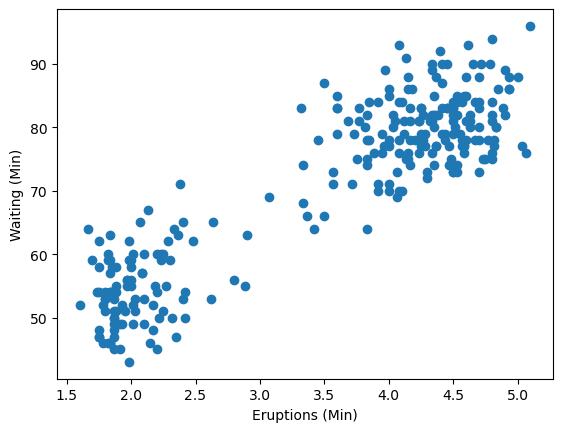

In [2]:
file_temp = 'old_faithful.txt'
file = os.path.join(os.getcwd(), file_temp)
xs1 = np.loadtxt(file)

print(xs1.shape)
print(xs1[0])
print(xs1[1])

plt.scatter(xs1[:,0], xs1[:,1])
plt.xlabel('Eruptions (Min)')
plt.ylabel('Waiting (Min)')
plt.show()

## Sample Generation

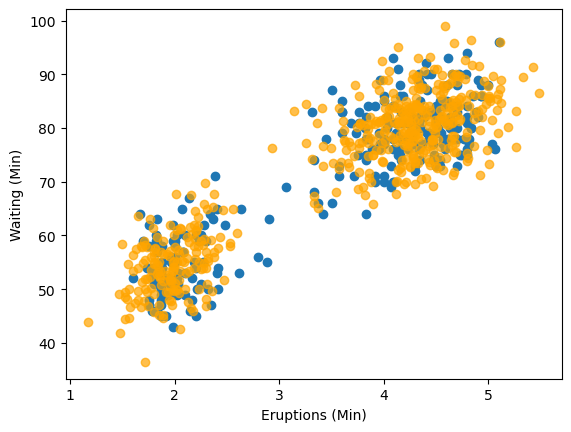

In [3]:
mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])


def sample():
    k = np.random.choice(2, p=phis)
    mu, cov = mus[k], covs[k]
    x = np.random.multivariate_normal(mu, cov)
    return x


N = 500
xs2 = np.zeros((N, 2))
for i in range(N):
     xs2[i] = sample()

plt.scatter(xs1[:,0], xs1[:,1])
plt.scatter(xs2[:,0], xs2[:,1], color='orange', alpha=0.7)
plt.xlabel('Eruptions (Min)')
plt.ylabel('Waiting (Min)')
plt.show()

In [4]:
def multivariate_normal(x, mu, cov):
    D = len(x)
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)

    a = 1 / np.sqrt( (2 * np.pi)**D * det)
    b = np.exp( -(x - mu).T @ inv @ (x - mu) / 2.0)
    return a * b

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

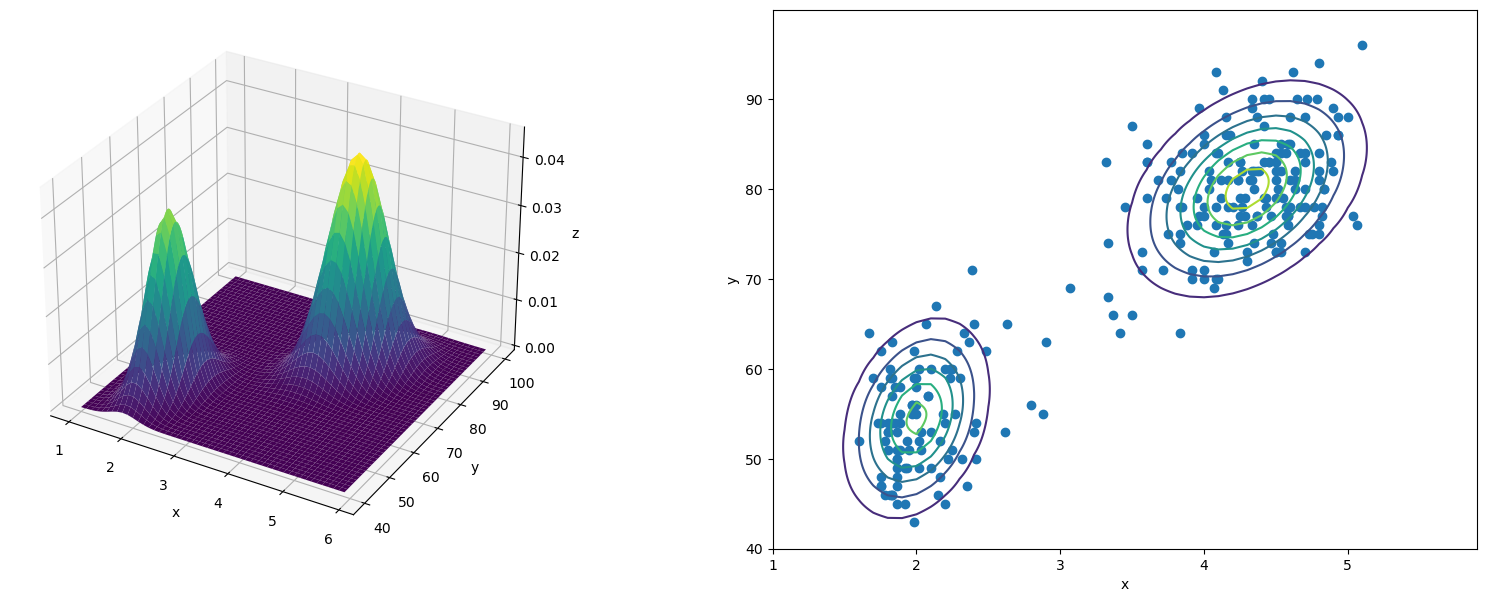

In [5]:
mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])


xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure(figsize=(20, 7))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
ax2.scatter(xs1[:,0], xs1[:,1])

plt.show()